### Wangling Data
In order to answer the questions asked in step 1, we are going to define some functions to start working with the data to get what we want.

At this point, it would be interesting to use a database to facilitate the integration of the two datasets, however, I will be using only python to browse the files for learning purposes.

In [232]:
import re
import os
import sys
import pandas as pd
from utils import print_pretty
from statisticalAnalysis import meanTestFiltered, avgGrade

In [87]:
# Processed dataset path ENEM
enem_analysis_path = os.getcwd() + '/data/analysis/enem_analysis.csv'
enem_analysis_df = pd.read_csv(enem_analysis_path, delimiter=";")

# If you want to perform a quick test, uncomment this line.
# This line takes only 1% of the dataset evenly.
# enem_analysis_df = enem_analysis_df.drop(enem_analysis_df.index.difference([x for x in range(0, len(enem_analysis_df), 100)]))

print(enem_analysis_df.shape)
enem_analysis_df

(5513747, 41)


,registration,city_residence_code,city_residence,state_residence_code,state_residence,age,gender,matiral_status,color_race,nationality,...,presence_natural_science,presence_human_science,presence_languages,presence_math,grade_natural_science,grade_human_science,grade_languages,grade_math,essay_status,grade_essay
0,180008202043,5300108,Brasília,53,DF,44.0,M,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,180007197856,2111102,São João dos Patos,21,MA,23.0,F,0.0,3,1,...,1.0,1.0,1.0,1.0,521.0,568.7,513.1,480.3,1.0,280.0
2,180008517434,3530607,Mogi das Cruzes,35,SP,23.0,F,0.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,180007661228,2916401,Itapetinga,29,BA,26.0,F,0.0,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,180008787987,2918100,Jeremoabo,29,BA,20.0,M,0.0,0,1,...,0.0,1.0,1.0,0.0,0.0,419.9,345.8,0.0,1.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513742,180013945649,3304557,Rio de Janeiro,33,RJ,56.0,F,1.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5513743,180013964149,1302603,Manaus,13,AM,20.0,F,0.0,3,1,...,1.0,1.0,1.0,1.0,435.6,556.8,460.8,528.1,1.0,320.0
5513744,180013980226,3550308,São Paulo,35,SP,17.0,F,0.0,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5513745,180013934137,3509502,Campinas,35,SP,17.0,F,0.0,1,1,...,1.0,1.0,1.0,1.0,524.9,496.5,512.5,474.1,1.0,340.0


In [93]:
# Processed dataset path Brazil Cities
cities_analysis_path = os.getcwd() + '/data/analysis/cities_analysis.csv'
cities_analysis_df = pd.read_csv(cities_analysis_path, delimiter=";")

print(cities_analysis_df.shape)
cities_analysis_df

(5573, 11)


,city,state,capital,hdi_ranking,hdi,hdi_gni,hdi_life,hdi_education,longitude,latitude,altitude
0,Abadia De Goiás,GO,0,1689.0,0.708,0.687,0.830,0.622,-49.440548,-16.758812,893.60
1,Abadia Dos Dourados,MG,0,2207.0,0.690,0.693,0.839,0.563,-47.396832,-18.487565,753.12
2,Abadiânia,GO,0,2202.0,0.690,0.671,0.841,0.579,-48.718812,-16.182672,1017.55
3,Abaeté,MG,0,1994.0,0.698,0.720,0.848,0.556,-45.446191,-19.155848,644.74
4,Abaetetuba,PA,0,3530.0,0.628,0.579,0.798,0.537,-48.884404,-1.723470,10.12
...,...,...,...,...,...,...,...,...,...,...,...
5568,Xique-Xique,BA,0,4533.0,0.585,0.563,0.741,0.479,-42.725508,-10.824974,406.26
5569,Zabelê,PB,0,3639.0,0.623,0.567,0.725,0.587,-37.093552,-8.076874,646.34
5570,Zacarias,SP,0,1072.0,0.730,0.695,0.826,0.674,-50.055740,-21.050110,415.85
5571,Zé Doca,MA,0,4272.0,0.595,0.559,0.745,0.505,-45.657698,-3.275481,35.66


In [400]:
def avgGrade(enem, onlyPresent=True
            ,columns=['grade_natural_science', 'grade_human_science', 'grade_languages', 'grade_math', 'grade_essay']
            ):
    """
        Returns average grade of each test.
        Parameters:
            enem (pandas dataframe): ENEM dataframe that contains all grades.
            onlyPresent (boolean): TRUE if you only want the grades of the students who took the test. FALSE if you want all the grades.
        Returns:
            dictionary with test content and their respective averages, min e max grades.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    
    if onlyPresent:
        fig = plt.figure()
        for i in range(len(columns)):
            ax = fig.add_subplot(2,3,i+1)
            enem.replace(0, np.NaN).plot.kde(y=columns[i], ax=ax, figsize=(20,15))
            
        return { 'natural_science': { 'presence': enem['presence_natural_science'].sum()
                                     ,'mean': enem.replace(0, np.NaN)['grade_natural_science'].mean()
                                     ,'min': enem.replace(0, np.NaN)['grade_natural_science'].min()
                                     ,'max': enem.replace(0, np.NaN)['grade_natural_science'].max()
                                    }
                ,'human_science': { 'presence': enem['presence_human_science'].sum()
                                   ,'mean': enem.replace(0, np.NaN)['grade_human_science'].mean()
                                   ,'min': enem.replace(0, np.NaN)['grade_human_science'].min()
                                   ,'max': enem.replace(0, np.NaN)['grade_human_science'].max()
                                  }
                ,'languages': { 'presence': enem['presence_languages'].sum()
                               , 'mean': enem.replace(0, np.NaN)['grade_languages'].mean()
                               ,'min': enem.replace(0, np.NaN)['grade_languages'].min()
                               ,'max': enem.replace(0, np.NaN)['grade_languages'].max()
                              }
                ,'math': { 'presence': enem['presence_math'].sum()
                          ,'mean': enem.replace(0, np.NaN)['grade_math'].mean()
                          ,'min': enem.replace(0, np.NaN)['grade_math'].min()
                          ,'max': enem.replace(0, np.NaN)['grade_math'].max()
                         }
                ,'essay': { 'presence': enem.replace(0, np.NaN)['essay_status'].count()
                           ,'mean': enem.replace(0, np.NaN)['grade_essay'].mean()
                           ,'min': enem.replace(0, np.NaN)['grade_essay'].min()
                           ,'max': enem.replace(0, np.NaN)['grade_essay'].max()
                          }
               }
    else:
        fig = plt.figure()
        for i in range(len(columns)):
            ax = fig.add_subplot(2,3,i+1)
            enem.plot.kde(y=columns[i], ax=ax, figsize=(20,15))
        return { 'natural_science': { 'mean': enem['grade_natural_science'].mean()
                                     ,'min': enem['grade_natural_science'].min()
                                     ,'max': enem['grade_natural_science'].max()
                                    }
                ,'human_science': { 'mean': enem['grade_human_science'].mean()
                                   ,'min': enem['grade_human_science'].min()
                                   ,'max': enem['grade_human_science'].max()
                                  }
                ,'languages': { 'mean': enem['grade_languages'].mean()
                               ,'min': enem['grade_languages'].min()
                               ,'max': enem['grade_languages'].max()
                              }
                ,'math': { 'mean': enem['grade_math'].mean()
                          ,'min': enem['grade_math'].min()
                          ,'max': enem['grade_math'].max()
                         }
                ,'essay': { 'mean': enem['grade_essay'].mean()
                           ,'min': enem['grade_essay'].min()
                           ,'max': enem['grade_essay'].max()
                          }
               }

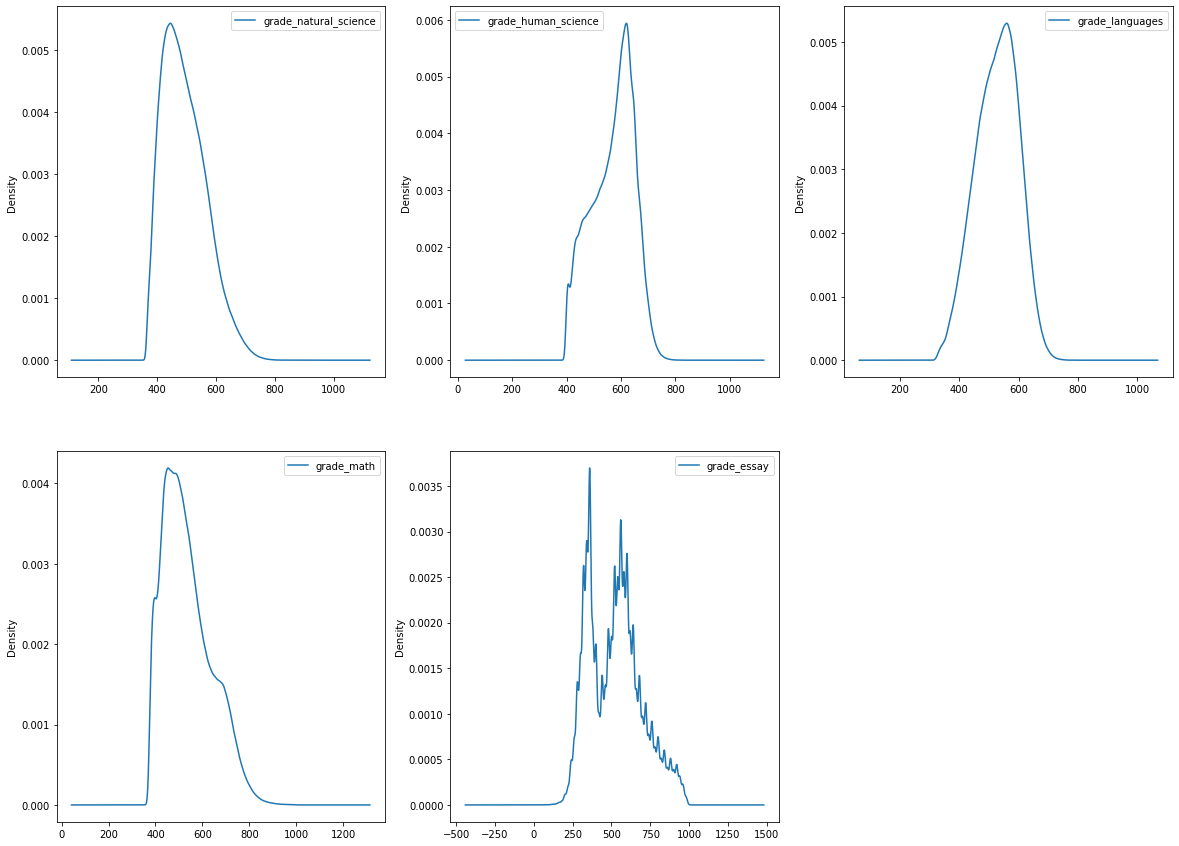

In [401]:
resPresent = avgGrade(enem_analysis_df)

In [402]:
def gradeHDIRelation( enem, cities, onlyPresent=True
                     ,lines=['hdi', 'hdi_gni', 'hdi_life', 'hdi_education']
                     ,columns=['grade_natural_science', 'grade_human_science', 'grade_languages', 'grade_math', 'grade_essay']
                     ,fit=True
                    ):
    """
        Relates the average scores for each test to the cities' HDI, makes a graph and returns the dataset with the average scores for each city.
        Parameters:
            enem (pandas dataframe): ENEM dataframe that contains all grades.
            cities (pandas dataframe): Cities dataframe that contains all hdi.
            onlyPresent (boolean): TRUE if you only want the grades of the students who took the test. FALSE if you want all the grades.
            lines (list): list of all hdi that you want to plot. MAX length = 4.
            columns (list): list of all test content that you want to plot.
        Returns:
            Cities dataframe with average grades columns.
    """
    cities = cities[cities.columns[~cities.columns.isin(['capital'])]]
    if onlyPresent:
        mean_by_city = enem.replace(0, np.NaN).groupby(['city_residence','state_residence'], as_index=False).mean()
    else:
        mean_by_city = enem.groupby(['city_residence','state_residence'], as_index=False).mean()
    cities_avg = pd.merge(cities, mean_by_city, how='inner', left_on=['city','state'], right_on=['city_residence','state_residence'])
    df = cities_avg[~(cities_avg == 0).any(axis=1)]
    
    fig = plt.figure()
    for i in range(len(lines)):
        ax = fig.add_subplot(2, 2, i+1)
        df.sort_values(by=lines[i]).plot(kind='line', x=lines[i], y=columns, ax=ax, figsize=(20, 15))

    return cities_avg

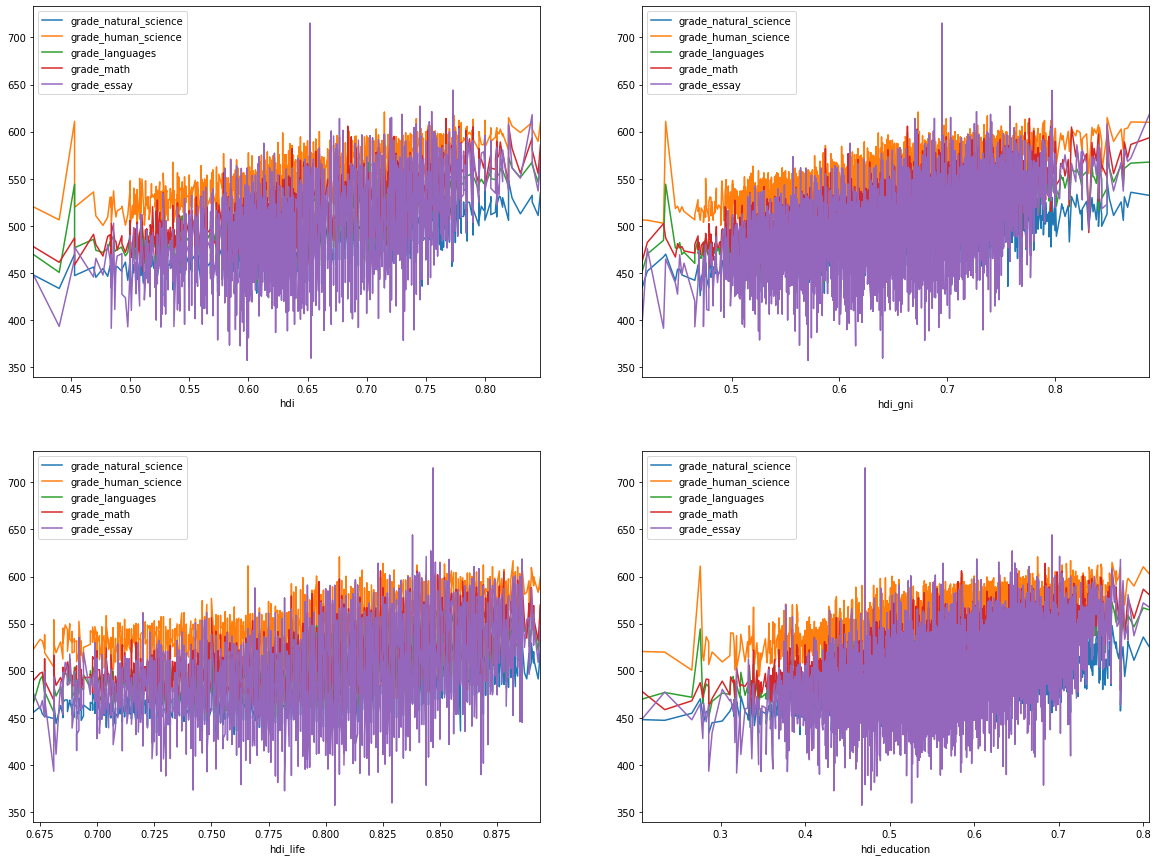

In [403]:
gradeHDIRelation(enem_analysis_df
                     .filter([ 'city_residence'
                              ,'state_residence'
                              ,'grade_natural_science'
                              ,'grade_human_science'
                              ,'grade_languages'
                              ,'grade_math'
                              ,'grade_essay'
                             ])
                     ,cities_analysis_df
                    )
a = 1

In [358]:
def gradeCityDisabilityRelation(enem, cities, onlyPresent=True
                               ,lines=[]
                               ,columns=['grade_natural_science', 'grade_human_science', 'grade_languages', 'grade_math', 'grade_essay']
                               ):
    def_columns = list(filter(lambda col: re.search("def", col), list(enem.columns)))
    
    enem['has_disability'] = enem[def_columns].sum(axis=1).apply(lambda x: True if x>0 else False)
    enem = enem[enem.columns[~enem.columns.isin(def_columns)]]
    
    cities = cities[cities.columns[~cities.columns.isin(['hdi_ranking', 'hdi'
                                                         ,'hdi_gni', 'hdi_life'
                                                         , 'hdi_education', 'capital'
                                                         , 'longitude', 'latitude', 'altitude'
                                                        ])]]
    
    if onlyPresent:
        mean_by_city = enem.replace(0, np.NaN).groupby(['has_disability', 'city_residence','state_residence'], as_index=False).mean()
    else:
        mean_by_city = enem.groupby(['has_disability', 'city_residence','state_residence'], as_index=False).mean()
    cities_avg = pd.merge(cities, mean_by_city, how='inner', left_on=['city','state'], right_on=['city_residence','state_residence'])
    print(type(cities_avg))
#     cities_avg.fillna(0, inplace=True)
    
    return cities_avg

In [393]:
res = gradeCityDisabilityRelation(enem_analysis_df
                            .filter([ 'city_residence'
                                     ,'state_residence'
                                     ,'grade_natural_science'
                                     ,'grade_human_science'
                                     ,'grade_languages'
                                     ,'grade_math'
                                     ,'grade_essay'
                                     ,*list(filter(lambda col: re.search("def", col), list(enem_analysis_df.columns)))
                                     ])
                            ,cities_analysis_df
                           )
res

<class 'pandas.core.frame.DataFrame'>


,city,state,has_disability,city_residence,state_residence,grade_natural_science,grade_human_science,grade_languages,grade_math,grade_essay
0,Abadiânia,GO,False,Abadiânia,GO,483.117391,550.450000,516.971371,533.183913,534.177215
1,Abadiânia,GO,True,Abadiânia,GO,479.650000,557.400000,425.000000,561.400000,550.000000
2,Abaeté,MG,False,Abaeté,MG,509.208831,588.611634,544.203960,566.336883,546.130653
3,Abaetetuba,PA,False,Abaetetuba,PA,469.984889,536.420817,493.332785,495.895996,498.631028
4,Abaetetuba,PA,True,Abaetetuba,PA,464.290000,520.354902,471.268627,482.050000,457.021277
...,...,...,...,...,...,...,...,...,...,...
6757,Zabelê,PB,False,Zabelê,PB,450.787500,543.570667,487.488000,505.148611,479.117647
6758,Zacarias,SP,False,Zacarias,SP,487.454545,551.081818,498.009091,514.200000,509.375000
6759,Zé Doca,MA,False,Zé Doca,MA,460.385697,524.439797,488.984572,489.884615,451.914388
6760,Zé Doca,MA,True,Zé Doca,MA,450.140000,533.750000,459.583333,455.220000,452.000000


In [392]:
# df = res.loc[res['city'].isin(['São Paulo','Abadiânia'])]
d = res.groupby(['city', 'state'], as_index=False).diff().dropna()
d

,grade_natural_science,grade_human_science,grade_languages,grade_math,grade_essay
1,-3.467391,6.950000,-91.971371,28.216087,15.822785
4,-5.694889,-16.065915,-22.064157,-13.845996,-41.609751
8,31.691071,-53.279444,5.556667,143.071131,-86.468843
10,249.938462,175.506024,198.418072,319.562821,522.500000
13,-52.017857,-65.132584,-90.361111,-19.972619,-260.909091
...,...,...,...,...,...
6750,-15.357489,-6.380999,-63.768796,-22.362597,-107.358025
6752,122.769072,111.347573,133.588350,19.689691,65.888325
6754,-24.234708,-25.380146,-65.964931,-62.314054,-67.559576
6756,-83.597811,-20.522938,-11.863918,-95.401231,-181.141304


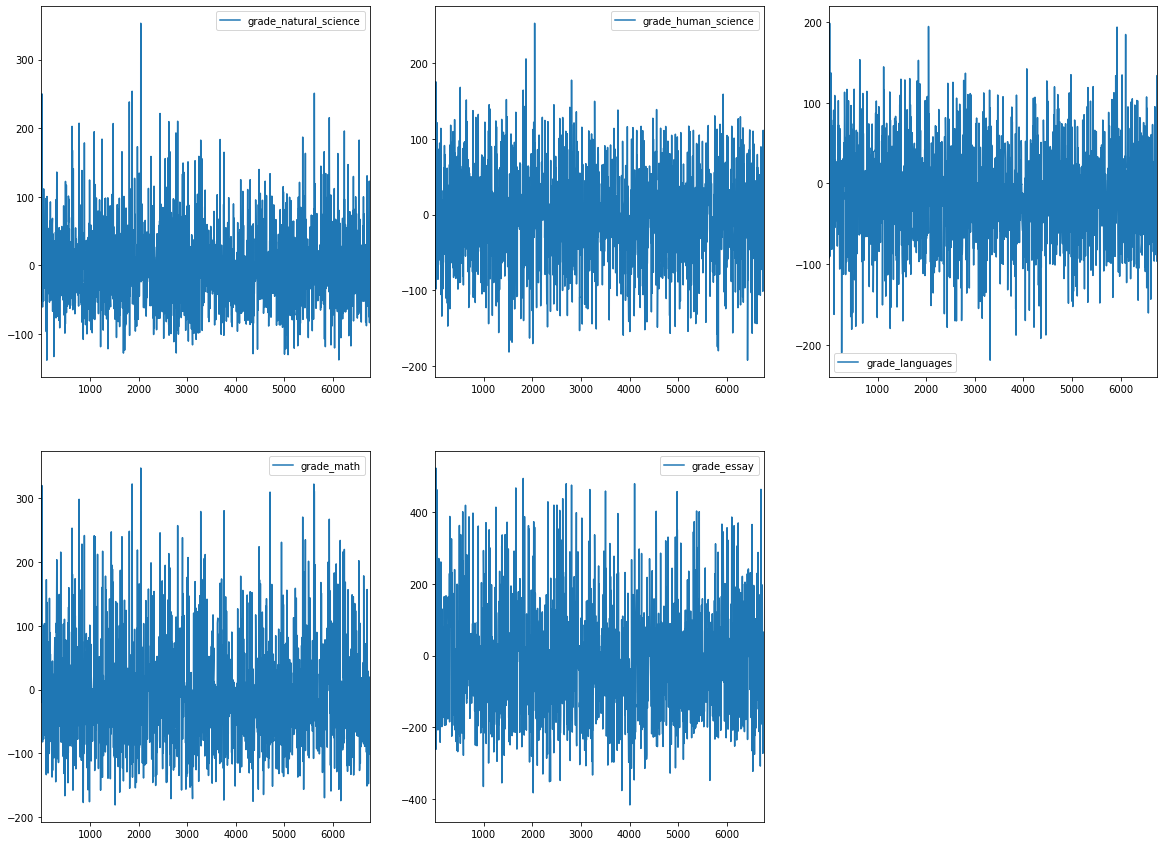

In [390]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

columns=['grade_natural_science', 'grade_human_science', 'grade_languages', 'grade_math', 'grade_essay']

fig = plt.figure()
for i in range(len(columns)):
    ax = fig.add_subplot(2,3,i+1)
    d.plot(kind='line', y=columns[i], ax=ax, figsize=(20, 15))